<a href="https://colab.research.google.com/github/vineet-babar44/Vineet-Babar-s-Projects/blob/main/Zomato_Data_Analysis_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zomato Data Analysis


## Step 1 : Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2 : Create the data frame

In [ ]:
dataframe = pd.read_csv('Zomato data .csv')
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


## Step 3 : Data Cleaning

The 'rate' column needs to be cleaned. The entered data is in the form of : (Rating/5). We dont want the denominator(/5) because it will be hard for us later to analyze the data properly.

In [ ]:
def remove_denominator(value):
    value=str(value).split('/')[0]
    return float(value)

In [ ]:
dataframe['rate']=dataframe['rate'].apply(remove_denominator)
dataframe

In [ ]:
del dataframe['book_table']

Final check for null values or missing data

In [ ]:
dataframe.info()

##### **QUESTIONS**
---



## Q.1 What Type of restaurant do the majority of customers order from?

Text(0.5, 1.0, 'Distribution of Restaurant Types')

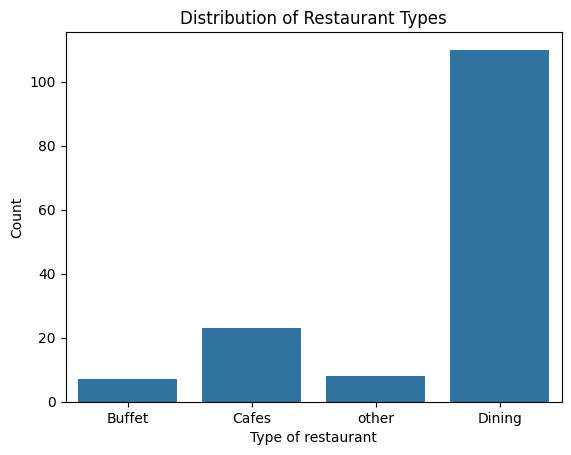

In [ ]:
sns.countplot(x=dataframe['listed_in(type)'], data=dataframe)
plt.xlabel('Type of restaurant')
plt.ylabel('Count')
plt.title('Distribution of Restaurant Types')

### Conclusion :
> Majority of customers order from dinning Category.



## Q.2 How many votes did each type of restaurant has received from the customers?

In [ ]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
grouped_data

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


Text(0.5, 1.0, 'Total votes for each restaurant type')

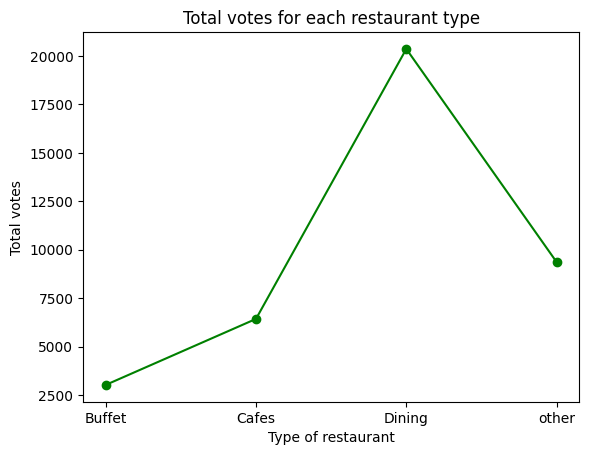

In [ ]:
result= pd.DataFrame({'votes':grouped_data})
plt.plot(grouped_data, c='green', marker='o')
plt.xlabel('Type of restaurant', size='10')
plt.ylabel('Total votes')
plt.title('Total votes for each restaurant type')

### Conclusion :
> Highest votes are recieved by the dinning category typ i.e. **20,363**



## Q.3 What are the ratings that the majority of restaurants has recieved  ?

Text(0.5, 1.0, 'Distribution of Ratings')

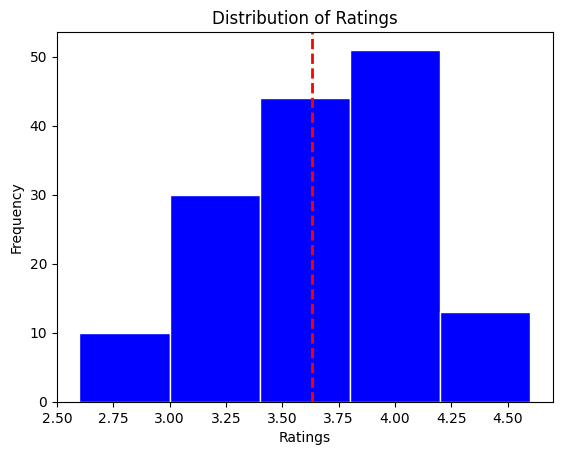

In [ ]:
plt.hist(dataframe['rate'], bins=5, color='blue', edgecolor='white')
plt.xlabel('Ratings')
plt.ylabel('Frequency')

### Conclusion :
> Majority of customers has recieved raings from 3.5 to 4.



## Q.4 What is the average spending of customers while ordering food ?

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

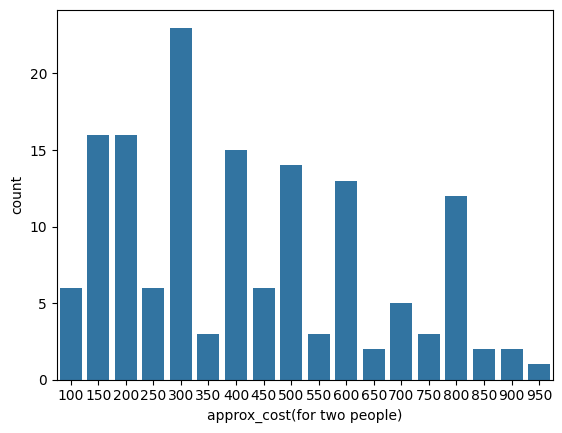

In [ ]:
couples_budget=dataframe['approx_cost(for two people)']
sns.countplot(x=couples_budget, data=dataframe)

### Conclusion :
> Majority of couples that order online have a approx budget of Rs.300/-



## Q.5 Which mode recieves maximum ratings

<Figure size 800x800 with 0 Axes>

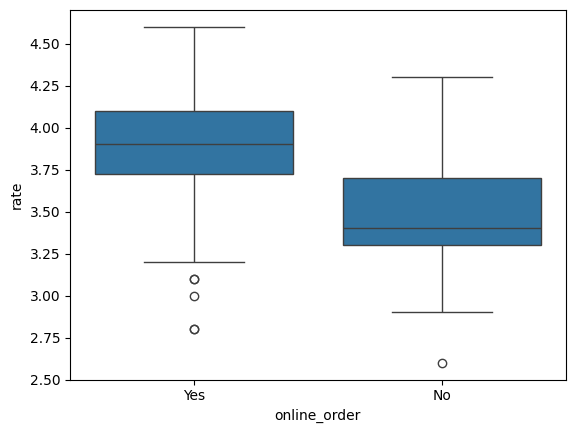

<Figure size 800x800 with 0 Axes>

In [ ]:
sns.boxplot(x=dataframe['online_order'], y=dataframe['rate'])
plt.figure(figsize=(8,8))

### Conclusion :
> Online order recieved higher ratings than offline order



## Q.6 Which type of restaurants recieved more offline orders

Text(50.722222222222214, 0.5, 'Restaurant Type')

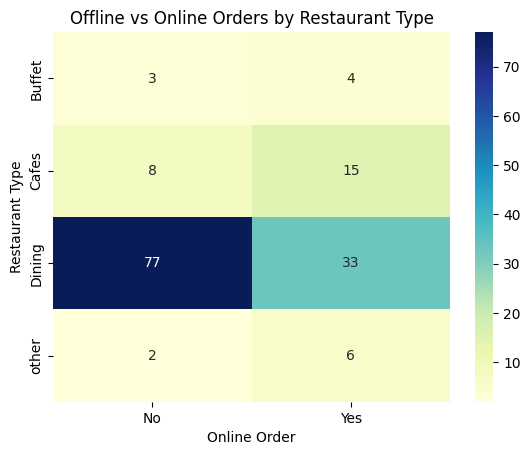

In [ ]:
pivot_table=dataframe.pivot_table(index='listed_in(type)', columns='online_order',aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title('Offline vs Online Orders by Restaurant Type')
plt.xlabel('Online Order')
plt.ylabel('Restaurant Type')

### Conclusion :
> For Cafes - Online orders were recieved more than offline orders

> For restaurants - Offline orders were recieved more than online orders.
